In [ ]:
# to reload local packages when debugging
%load_ext autoreload
%autoreload 2

%cd /mnt/c/Users/resha/Documents/Github/balancing_framework/

import pickle
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# load data itself

with open('/mnt/c/Users/resha/Documents/Github/balancing_framework/spy5m_bintp_labelled.pkl', 'rb') as f:
    df_original = pickle.load(f)
with open('/mnt/c/Users/resha/Documents/Github/balancing_framework/spy5m_bintp004_episodes_fracdiff.pkl', 'rb') as f:
    df_fd = pickle.load(f)
with open('/mnt/c/Users/resha/Documents/Github/balancing_framework/spy5m_labelled_episodes_ta.pkl', 'rb') as f:
    df_ta = pickle.load(f)
    df_ta['label'] = df_original['tp_0.004'][df_ta.index]
# PZ algorithm has some look ahead so remove the episode labels, will be uesd only for some kind of analysis afterwards
# df = df_original.drop(columns=['episode']) 
df = df_original[["volume", "vwap", "open", "close", "high", "low", "transactions", "tp_0.004"]].rename(columns={"tp_0.004": "label"}) # 0.01 0.001
# df

# load results
results_dir_base = f'/mnt/c/Users/resha/Documents/Github/balancing_framework/results'

results_dir_1_2 = results_dir_base + '/single form runs (runs 1 and 2)/chunk_size=10000 num_runs=2 sp500 random_forest'
# run 1 - single forms
with open(f'{results_dir_1_2}/adaptation_results_original.pkl', 'rb') as f:
    ada_original = pickle.load(f)
with open(f'{results_dir_1_2}/consolidation_results_original.pkl', 'rb') as f:
    cons_original = pickle.load(f)

with open(f'{results_dir_1_2}/adaptation_results_frac_diff.pkl', 'rb') as f:
    ada_fd = pickle.load(f)
with open(f'{results_dir_1_2}/consolidation_results_frac_diff.pkl', 'rb') as f:
    cons_fd = pickle.load(f)

with open(f'{results_dir_1_2}/adaptation_results_first_order_diff.pkl', 'rb') as f:
    ada_fod = pickle.load(f)
with open(f'{results_dir_1_2}/consolidation_results_first_order_diff.pkl', 'rb') as f:
    cons_fod = pickle.load(f)

# run 2 - w/ta
with open(f'{results_dir_1_2}/adaptation_results_ta_original.pkl', 'rb') as f:
    ada_ta_original = pickle.load(f)
with open(f'{results_dir_1_2}/consolidation_results_ta_original.pkl', 'rb') as f:
    cons_ta_original = pickle.load(f)
with open(f'{results_dir_1_2}/adaptation_results_ta_fod.pkl', 'rb') as f:
    ada_ta_fod = pickle.load(f)
with open(f'{results_dir_1_2}/consolidation_results_ta_fod.pkl', 'rb') as f:
    cons_ta_fod = pickle.load(f)


# run 3 - retaining original features
results_dir_3 = results_dir_base + '/chunk_size=10000 num_runs=10 sp500 random_forest'

with open(f"{results_dir_3}/adaptation_results_['original', 'first_order_diff'].pkl", 'rb') as f:
    ada_original_fod = pickle.load(f)
with open(f"{results_dir_3}/consolidation_results_['original', 'first_order_diff'].pkl", 'rb') as f:
    cons_original_fod = pickle.load(f)

with open(f"{results_dir_3}/adaptation_results_['original', 'frac_diff', 'first_order_diff'].pkl", 'rb') as f:
    ada_original_fod_fd = pickle.load(f)
with open(f"{results_dir_3}/consolidation_results_['original', 'frac_diff', 'first_order_diff'].pkl", 'rb') as f:
    cons_original_fod_fd = pickle.load(f)

with open(f"{results_dir_3}/adaptation_results_['original', 'frac_diff'].pkl", 'rb') as f:
    ada_original_fd = pickle.load(f)
with open(f"{results_dir_3}/consolidation_results_['original', 'frac_diff'].pkl", 'rb') as f:
    cons_original_fd = pickle.load(f)

# run 4 - retaining with ta
with open(f"{results_dir_3}/adaptation_results_['ta_frac_diff'].pkl", 'rb') as f:
    ada_ta_fd = pickle.load(f)
with open(f"{results_dir_3}/consolidation_results_['ta_frac_diff'].pkl", 'rb') as f:
    cons_ta_fd = pickle.load(f)

with open(f"{results_dir_3}/adaptation_results_['ta_original', 'ta_frac_diff'].pkl", 'rb') as f:
    ada_tao_tafd = pickle.load(f)
with open(f"{results_dir_3}/consolidation_results_['ta_original', 'ta_frac_diff'].pkl", 'rb') as f:
    cons_tao_tafd = pickle.load(f)


In [5]:
def plot_changes(result_sets, metric, focused_form, title):
    plt.figure(figsize=(6, 4))  

    for result_set in result_sets:
        set_title = result_set[0]
        set_data = result_set[1]
        means1 = np.array([ x[f'{metric}_mean']*100 for x in set_data ])
        changes = np.diff(means1)
        timestamps1 = np.array([ x['last_ts'] for x in set_data ])[1:] # skip first to align with the diffs

        print(set_title)
        print(f'Average change: {np.mean(changes):.5g}, Highest change: {np.max(changes):.5g}, Lowest change: {np.min(changes):.5g}')

        if set_title == focused_form:
            sns.lineplot(x=timestamps1, y=changes, label=set_title, linewidth=2)
        else:
            sns.lineplot(x=timestamps1, y=changes, label=set_title, linewidth=0.5)

    plt.title(f'{title}: {metric}')
    plt.xlabel('Timestamp')
    plt.ylabel(f'{metric}')
    plt.legend()

    plt.tight_layout()  # adjust the layout to fit the figure size
    # plt.show()

def plot_metric(result_sets, metric, focused_form, title):
    plt.figure(figsize=(6, 4))  

    for result_set in result_sets:
        set_title = result_set[0]
        set_data = result_set[1]
        means1 = np.array([ x[f'{metric}_mean']*100 for x in set_data ])
        # std1 = np.array([ x[f'{metric}_std'] for x in set_data ])
        timestamps1 = np.array([ x['last_ts'] for x in set_data ])

        print(set_title)
        print(f'Average Value: {np.mean(means1):.5g}, Highest Value: {np.max(means1):.5g}, Lowest Value: {np.min(means1):.5g}')

        if set_title == focused_form:
            sns.lineplot(x=timestamps1, y=means1, label=set_title, linewidth=2)
        else:
            sns.lineplot(x=timestamps1, y=means1, label=set_title, linewidth=0.5)
        
        # plt.fill_between(timestamps1, means1 - std1, means1 + std1, alpha=0.3, label=f'{set_title} Std Dev')

    plt.title(f'{title}: {metric}')
    plt.xlabel('Timestamp')
    plt.ylabel(f'{metric}')
    plt.legend()

    plt.tight_layout()  # adjust the layout to fit the figure size
    # plt.show()


## Run 1 - Single Forms

original
Average change: -0.069668, Highest change: 15.65, Lowest change: -15.55
first order differencing
Average change: -0.020065, Highest change: 19.6, Lowest change: -23
fractional differencing
Average change: -0.105, Highest change: 25.95, Lowest change: -24.6



original
Average Value: 67.876, Highest Value: 83.9, Lowest Value: 49.1
first order differencing
Average Value: 62.503, Highest Value: 81.8, Lowest Value: 49.35
fractional differencing
Average Value: 65.279, Highest Value: 84.85, Lowest Value: 50.65


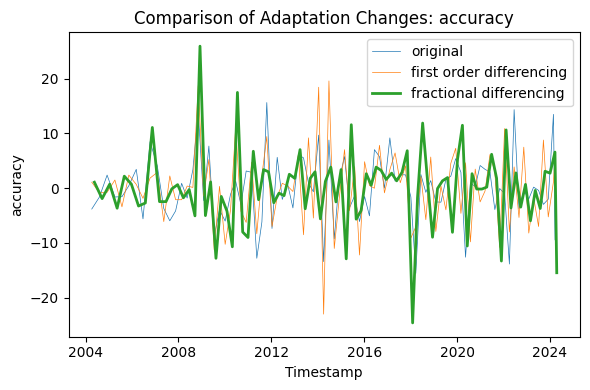

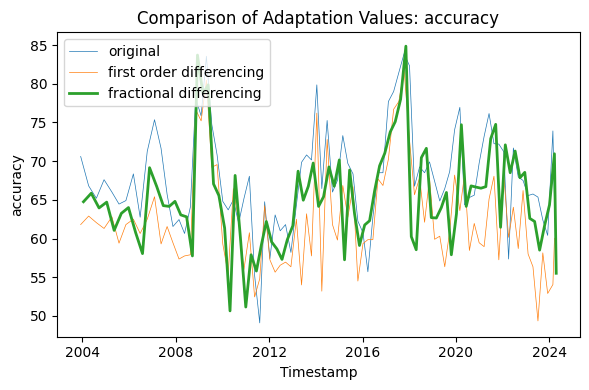

In [71]:
result_sets = [('original',ada_original), ('first order differencing', ada_fod), ('fractional differencing', ada_fd)]
metric = 'accuracy'
focused_form = 'fractional differencing'

plot_changes(result_sets, metric, focused_form, 'Comparison of Adaptation Changes')
print('\n\n')
plot_metric(result_sets, metric, focused_form, 'Comparison of Adaptation Values')

original
Average change: 0.041943, Highest change: 7.7609, Lowest change: -8.0036
first order differencing
Average change: -0.0073667, Highest change: 2.9229, Lowest change: -3.8717
fractional differencing
Average change: 0.021383, Highest change: 5.67, Lowest change: -6.3361



original
Average Value: 64.038, Highest Value: 66.504, Lowest Value: 58.233
first order differencing
Average Value: 60.414, Highest Value: 62.53, Lowest Value: 57.842
fractional differencing
Average Value: 62.513, Highest Value: 65.225, Lowest Value: 57.048


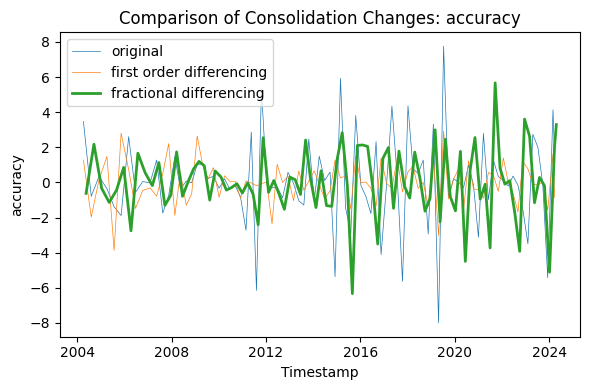

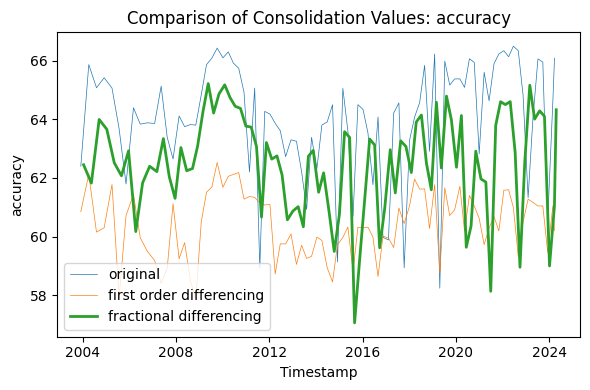

In [72]:
result_sets = [('original',cons_original), ('first order differencing', cons_fod), ('fractional differencing', cons_fd)]
metric = 'accuracy'
focused_form = 'fractional differencing'

plot_changes(result_sets, metric, focused_form, 'Comparison of Consolidation Changes')
print('\n\n')
plot_metric(result_sets, metric, focused_form, 'Comparison of Consolidation Values')

## Run 2 - w/TA

ta original
Average change: 0.045679, Highest change: 41.55, Lowest change: -40.4
ta first order differencing
Average change: -0.55967, Highest change: 16.8, Lowest change: -26.2



ta original
Average Value: 95.053, Highest Value: 100, Lowest Value: 57.25
ta first order differencing
Average Value: 70.73, Highest Value: 87, Lowest Value: 41.667


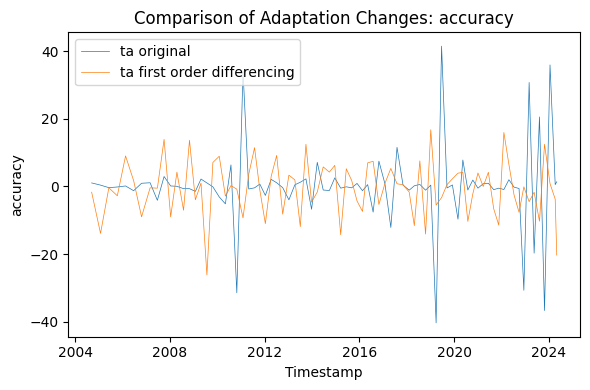

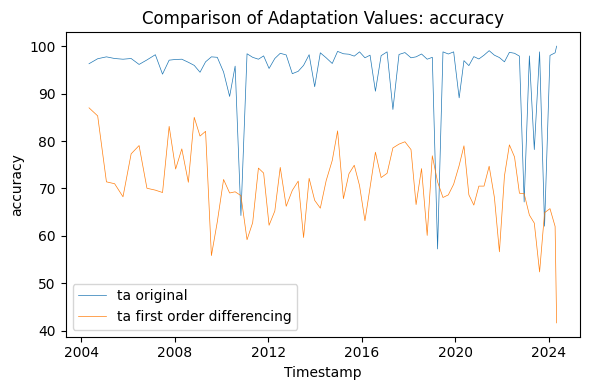

In [3]:
result_sets = [('ta original', ada_ta_original), ('ta first order differencing', ada_ta_fod)]
metric = 'accuracy'
focused_form = 'fractional differencing'

plot_changes(result_sets, metric, focused_form, 'Comparison of Adaptation Changes')
print('\n\n')
plot_metric(result_sets, metric, focused_form, 'Comparison of Adaptation Values')

ta original
Average change: 0.0299, Highest change: 37.151, Lowest change: -36.962
ta first order differencing
Average change: 0.00618, Highest change: 11.429, Lowest change: -10.483



ta original
Average Value: 93.717, Highest Value: 97.931, Lowest Value: 60.583
ta first order differencing
Average Value: 69.107, Highest Value: 83.033, Lowest Value: 61.348


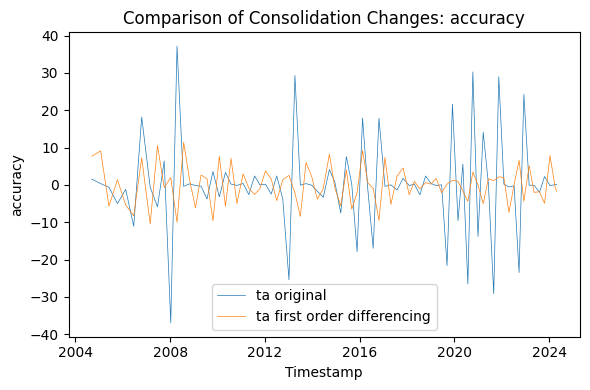

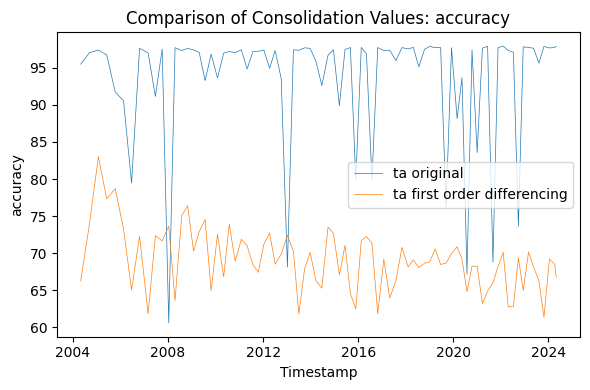

In [4]:
result_sets = [('ta original', cons_ta_original), ('ta first order differencing', cons_ta_fod)]
metric = 'accuracy'
focused_form = 'fractional differencing'

plot_changes(result_sets, metric, focused_form, 'Comparison of Consolidation Changes')
print('\n\n')
plot_metric(result_sets, metric, focused_form, 'Comparison of Consolidation Values')

## Run 3 - Retaining Original Features

original + frac diff
Average Value: 82.26, Highest Value: 93.77, Lowest Value: 73.71
original + first order diff
Average Value: 67.99, Highest Value: 85.26, Lowest Value: 55.69
original + frac diff + first order diff
Average Value: 79.022, Highest Value: 92.8, Lowest Value: 66.73
original
Average Value: 67.876, Highest Value: 83.9, Lowest Value: 49.1


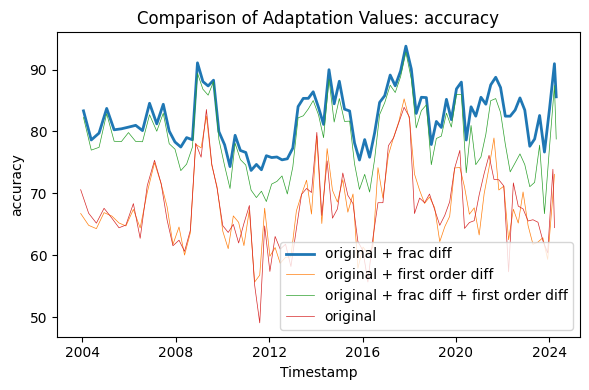

In [8]:
result_sets = [('original + frac diff', ada_original_fd), ('original + first order diff', ada_original_fod),
               ('original + frac diff + first order diff', ada_original_fod_fd), ('original', ada_original)]
metric = 'accuracy'
focused_form = 'original + frac diff'

# plot_changes(result_sets, metric, focused_form, 'Comparison of Adaptation Changes')
# print('\n\n')
plot_metric(result_sets, metric, focused_form, 'Comparison of Adaptation Values')

original + frac diff
Average Value: 78.008, Highest Value: 82.71, Lowest Value: 74.154
original + first order diff
Average Value: 64.299, Highest Value: 67.12, Lowest Value: 62.605
original + frac diff + first order diff
Average Value: 74.821, Highest Value: 81.59, Lowest Value: 70.137
original
Average Value: 64.038, Highest Value: 66.504, Lowest Value: 58.233


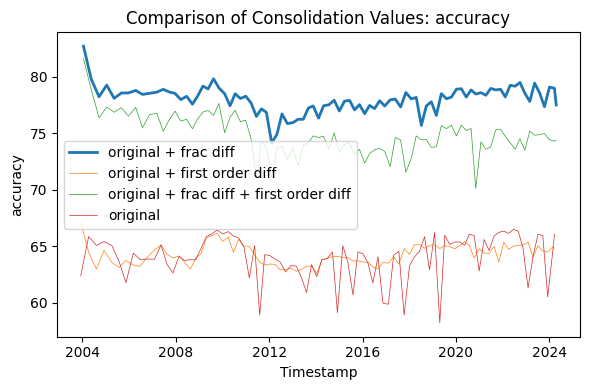

In [9]:
result_sets = [('original + frac diff', cons_original_fd), ('original + first order diff', cons_original_fod),
               ('original + frac diff + first order diff', cons_original_fod_fd), ('original', cons_original)]
metric = 'accuracy'
focused_form = 'original + frac diff'

# plot_changes(result_sets, metric, focused_form, 'Comparison of Adaptation Changes')
# print('\n\n')
plot_metric(result_sets, metric, focused_form, 'Comparison of Consolidation Values')

In [11]:
df

,volume,vwap,open,close,high,low,transactions,label
timestamp,,,,,,,,
2003-09-10 08:00:00-04:00,1000.0,102.8600,102.8600,102.8600,102.8600,102.86,1,0
2003-09-10 08:05:00-04:00,1600.0,102.8750,102.8600,102.9000,102.9000,102.86,4,0
2003-09-10 08:10:00-04:00,1300.0,102.8615,102.9000,102.8500,102.9000,102.85,2,0
2003-09-10 08:20:00-04:00,100.0,102.8000,102.8000,102.8000,102.8000,102.80,1,0
2003-09-10 08:25:00-04:00,17900.0,102.7358,102.7200,102.7300,102.7700,102.72,5,0
...,...,...,...,...,...,...,...,...
2024-04-30 19:40:00-04:00,10401.0,500.9938,500.9101,501.0682,501.0682,500.91,93,0
2024-04-30 19:45:00-04:00,3686.0,501.1517,501.1200,501.1500,501.1800,501.11,62,0
2024-04-30 19:50:00-04:00,1952.0,501.0709,501.1500,500.9900,501.1500,500.99,56,0


## Run 4

original + frac diff
Average Value: 99.741, Highest Value: 100, Lowest Value: 81.04
frac diff
Average Value: 99.962, Highest Value: 100, Lowest Value: 97.87
original
Average Value: 95.053, Highest Value: 100, Lowest Value: 57.25
original + frac diff
Average Value: 99.985, Highest Value: 100, Lowest Value: 99.49
frac diff
Average Value: 99.984, Highest Value: 100, Lowest Value: 99.269
original
Average Value: 93.717, Highest Value: 97.931, Lowest Value: 60.583


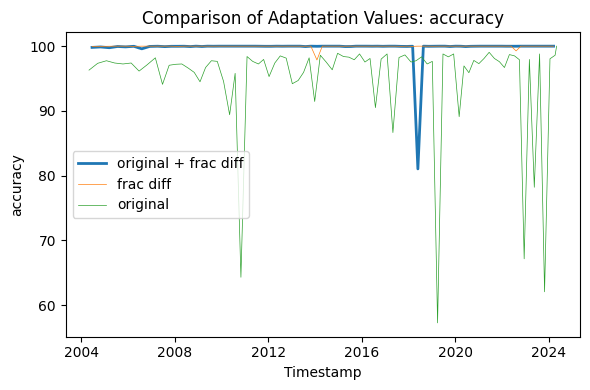

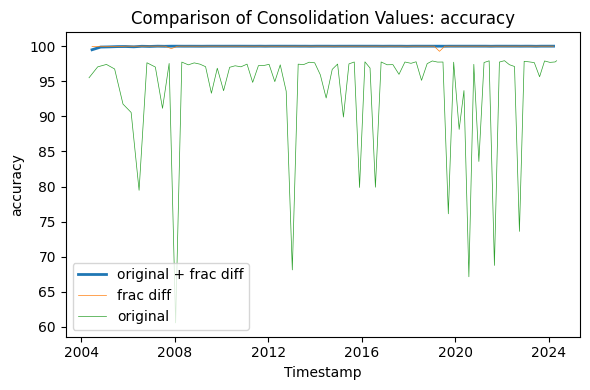

In [10]:
result_sets = [('original + frac diff', ada_tao_tafd), ('frac diff', ada_ta_fd),
               ('original', ada_ta_original)]
metric = 'accuracy'
focused_form = 'original + frac diff'

# plot_changes(result_sets, metric, focused_form, 'Comparison of Adaptation Changes')
# print('\n\n')
plot_metric(result_sets, metric, focused_form, 'Comparison of Adaptation Values')

result_sets = [('original + frac diff', cons_tao_tafd), ('frac diff', cons_ta_fd),
               ('original', cons_ta_original)]
metric = 'accuracy'
focused_form = 'original + frac diff'

plot_metric(result_sets, metric, focused_form, 'Comparison of Consolidation Values')

